In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import linregress

In [58]:
col = ['Energy (eV)', 'Psi (65)', 'Delta (65)', 'Psi (70)', 'Delta (70)', 'Psi (75)', 'Delta (75)', 'Fit Psi (65)', 'Fit Delta (65)', 'Fit Psi (70)', 'Fit Delta (70)', 'Fit Psi (75)', 'Fit Delta (75)']
angles = [str(i) for i in np.arange(65, 80, 5)]
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Ellipsometry\ALD_TiO2_on_Si'
files = [os.path.join(path, i) for i in os.listdir(path) if '.txt' in i]
df = pd.read_csv(files[1], skiprows=3, names = col, sep = '\t', index_col=False)

cat_df = pd.DataFrame()
n = 1
for i in angles:
    df_angle = pd.concat([df[col[0]], df[col[n]], df[col[n+1]], df[col[n+6]], df[col[n+7]]], axis = 1)
    df_angle = df_angle.rename(columns={col[n] : 'Psi', col[n+1] : 'Delta', col[n+6] : 'Fit Psi', col[n+7] : 'Fit Delta'})
    df_angle['Angle'] = i
    cat_df = pd.concat([cat_df, df_angle], ignore_index=True)
    n += 2

# fig, ax = plt.subplots(dpi = 200)
# ax2 = plt.twinx()
# sns.lineplot(data = cat_df, x = col[0], y = 'Psi', hue = 'Angle', ax = ax)
# sns.lineplot(data = cat_df, x = col[0], y = 'Delta', hue = 'Angle', ax = ax2, legend=True)

# sns.lineplot(data = cat_df, x = col[0], y = 'Fit Psi', hue = 'Angle', ax = ax, legend=False, palette='Greys', linestyle = '--')
# sns.lineplot(data = cat_df, x = col[0], y = 'Fit Delta', hue = 'Angle', ax = ax2, legend=True, palette='Greys', linestyle = '--')

test = cat_df.loc[cat_df['Angle'] == '75'].copy()

# fig, ax = plt.subplots(dpi = 100)
# sns.lineplot(data = test, x = col[0], y = 'Psi')
# sns.lineplot(data = test, x = col[0], y = 'Fit Psi', label = 'Fit')

# fig, ax = plt.subplots(dpi = 100)
# sns.lineplot(data = test, x = col[0], y = 'Delta')
# sns.lineplot(data = test, x = col[0], y = 'Fit Delta')
files

C:\Users\lopezb41\AppData\Local\Temp\ipykernel_20248\301761404.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(files[1], skiprows=3, names = col, sep = '\t', index_col=False)


['C:\\Users\\lopezb41\\OneDrive - imec\\Documents\\Experiments\\Data\\Ellipsometry\\ALD_TiO2_on_Si\\01_Ref_fit.txt',
 'C:\\Users\\lopezb41\\OneDrive - imec\\Documents\\Experiments\\Data\\Ellipsometry\\ALD_TiO2_on_Si\\02_ALD_TiO2_18_fit.txt',
 'C:\\Users\\lopezb41\\OneDrive - imec\\Documents\\Experiments\\Data\\Ellipsometry\\ALD_TiO2_on_Si\\03_ALD_TiO2_54_fit.txt',
 'C:\\Users\\lopezb41\\OneDrive - imec\\Documents\\Experiments\\Data\\Ellipsometry\\ALD_TiO2_on_Si\\04_ALD_TiO2_90_fit.txt']

1.2600000000000002


LinregressResult(slope=0.06972222222222221, intercept=0.6183333333333332, rvalue=0.9949174016567349, pvalue=0.06421287767543307, stderr=0.007056503290095468, intercept_stderr=0.4338458507606411)

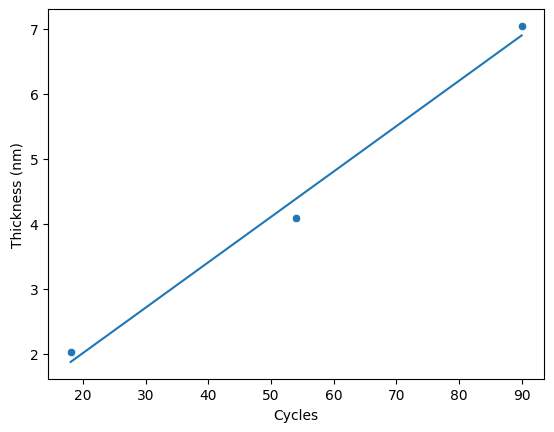

In [22]:
grow_rate = pd.DataFrame({'Cycles' : [18, 54, 90],
                          'Thickness (nm)' : [2.02, 4.09, 7.04]
                          })

result = linregress(grow_rate['Cycles'], grow_rate['Thickness (nm)'])  # slope, intercept, rvalue, pvalue, stderr, intercept_stderr

sns.scatterplot(data = grow_rate, x = 'Cycles', y = 'Thickness (nm)')
plt.plot(grow_rate['Cycles'], grow_rate['Cycles'] * result[0] + result[1])

print(0.07 * 18 )
result